In [1]:
import pandas as pd 

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

  
# Creating the dataframe  
df = pd.DataFrame({
    "A":[None, None, None, None, None, 11, None, None, None, None, None, None, None, None, None, None, None], 
    "B":[None, None, 5, 8, 6, 1, None, None, None, None, None, None, None, 6, 11, 4, 5],
    "C":[12, 4, None, 8, 6, 1, 5, None, 3, 6, 8, 7, 2, None, 11, 4, 5],
    "D":[12, 4, 5, 8, None, 1, 5, 13, 3, 6, None, 7, 2, 6, 11, 4, 5],
    "FECHA": ['2018-11-01', '2018-11-02', '2018-11-03', '2018-11-04', '2018-11-05',
             '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09', '2018-11-10',
             '2018-11-11', '2018-11-12', '2018-11-13', '2018-11-14', '2018-11-15',
             '2018-11-16', '2018-11-17']
})
df['FECHA'] = pd.to_datetime(df['FECHA'])
df.index = df['FECHA']
del df['FECHA']

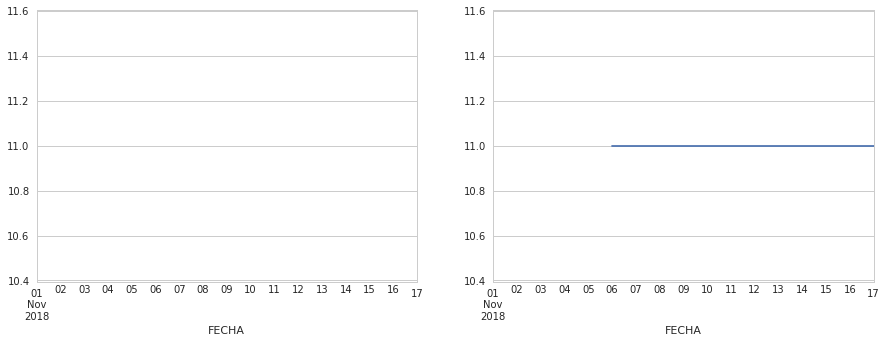

In [2]:
from IPython.display import display

df1 = df.copy()
for col in df1:
    df1[col].interpolate(method='time', inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
df['A'].plot(ax=axes[0])
df1['A'].plot(ax=axes[1])

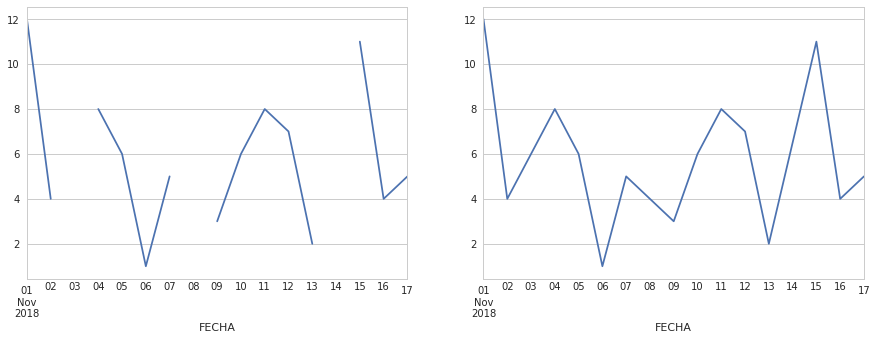

In [3]:
df2 = df.copy()
for col in df2:
    df2[col].interpolate(method='time', inplace=True)
    
from IPython.display import display
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
df['C'].plot(ax=axes[0])
df2['C'].plot(ax=axes[1])

In [4]:
display(df)
df3 = df.copy()

for col in df3:
    try:
        new_col = col+ '_new'
        df3['weekday'] = df3.index.weekday
        df3[new_col] = df3[col].copy()
        
        df3[new_col].interpolate(method='time', inplace=True)
        df3[new_col].fillna(df3[new_col].mean(), inplace=True)
        df3[new_col] = df3[new_col].rolling(7).mean()
        
        df3[col] = df3[[col, new_col]].apply(
            lambda _: _[new_col] 
            if str(_[new_col]).lower() != 'nan' and str(_[col]).lower() == 'nan'else _[col], axis=1
        )
        print("GO")
        if df3[col].isnull().sum() > 0:
            print("entro")
            df3[col].interpolate(method='time', inplace=True)
            df3[col].fillna(df3[new_col].mean(), inplace=True)
    except Exception as e:
        print(str(e))
display(df3)

,A,B,C,D
FECHA,,,,
2018-11-01,NaN,NaN,12.0,12.0
2018-11-02,NaN,NaN,4.0,4.0
2018-11-03,NaN,5.0,NaN,5.0
2018-11-04,NaN,8.0,8.0,8.0
2018-11-05,NaN,6.0,6.0,NaN
2018-11-06,11.0,1.0,1.0,1.0
2018-11-07,NaN,NaN,5.0,5.0
2018-11-08,NaN,NaN,NaN,13.0
2018-11-09,NaN,NaN,3.0,3.0


GO
entro
GO
entro
GO
entro
GO
entro


,A,B,C,D,weekday,A_new,B_new,C_new,D_new
FECHA,,,,,,,,,
2018-11-01,11.0,4.196104,12.000000,12.000000,3,NaN,NaN,NaN,NaN
2018-11-02,11.0,4.196104,4.000000,4.000000,4,NaN,NaN,NaN,NaN
2018-11-03,11.0,5.000000,6.000000,5.000000,5,NaN,NaN,NaN,NaN
2018-11-04,11.0,8.000000,8.000000,8.000000,6,NaN,NaN,NaN,NaN
2018-11-05,11.0,6.000000,6.000000,4.500000,0,NaN,NaN,NaN,NaN
2018-11-06,11.0,1.000000,1.000000,1.000000,1,NaN,NaN,NaN,NaN
2018-11-07,11.0,4.432143,5.000000,5.000000,2,11.0,4.432143,6.000000,5.642857
2018-11-08,11.0,4.082143,4.857143,13.000000,3,11.0,4.082143,4.857143,5.785714
2018-11-09,11.0,3.821429,3.000000,3.000000,4,11.0,3.821429,4.714286,5.642857


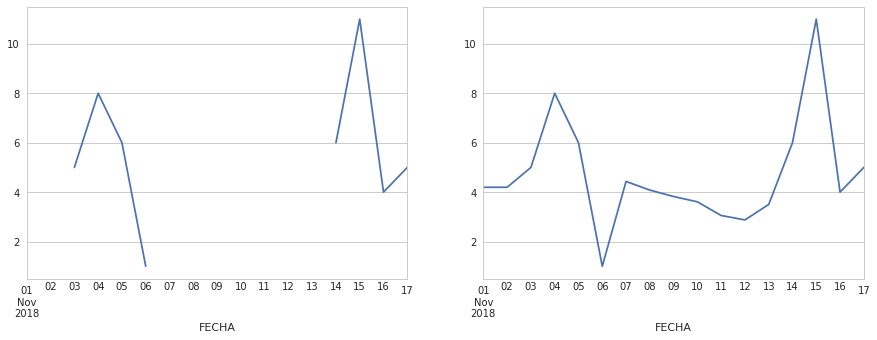

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
df['B'].plot(ax=axes[0])
df3['B'].plot(ax=axes[1])

In [6]:
display(df)
df3 = df.copy()

def calc_mean_weekday(val, col):
    return df3[
        (df3['weekday'] == val) & (df3[col] > 0) & (str(df3[col]).lower() != 'nan')
    ][col].mean()

for col in df3:
    try:
        new_col = col+ '_new'
        df3['weekday'] = df3.index.weekday
        df3[col].fillna(
            df3['weekday'].apply(lambda _: calc_mean_weekday(_, col)),
            inplace=True)
    except Exception as e:
        print(str(e))
display(df3)

,A,B,C,D
FECHA,,,,
2018-11-01,NaN,NaN,12.0,12.0
2018-11-02,NaN,NaN,4.0,4.0
2018-11-03,NaN,5.0,NaN,5.0
2018-11-04,NaN,8.0,8.0,8.0
2018-11-05,NaN,6.0,6.0,NaN
2018-11-06,11.0,1.0,1.0,1.0
2018-11-07,NaN,NaN,5.0,5.0
2018-11-08,NaN,NaN,NaN,13.0
2018-11-09,NaN,NaN,3.0,3.0


,A,B,C,D,weekday
FECHA,,,,,
2018-11-01,NaN,11.0,12.0,12.0,3
2018-11-02,NaN,4.0,4.0,4.0,4
2018-11-03,NaN,5.0,5.5,5.0,5
2018-11-04,NaN,8.0,8.0,8.0,6
2018-11-05,NaN,6.0,6.0,7.0,0
2018-11-06,11.0,1.0,1.0,1.0,1
2018-11-07,NaN,6.0,5.0,5.0,2
2018-11-08,NaN,11.0,11.5,13.0,3
2018-11-09,NaN,4.0,3.0,3.0,4


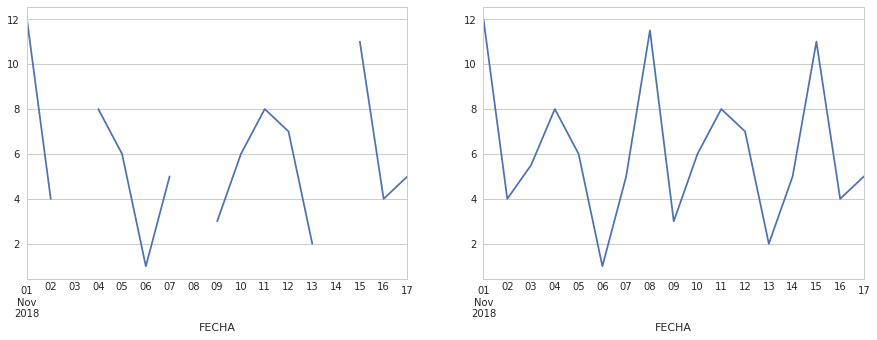

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
df['C'].plot(ax=axes[0])
df3['C'].plot(ax=axes[1])

In [9]:
df3['C'][-3:].mean()

6.666666666666667

In [11]:
type(df3['C'][-1])

numpy.float64